# Neural Networks

Multi-class logistic regression is a linear classifier and therefore cannot form as complex hypotheses as a Neural Network. This notebook will build a neural network from scratch and use it as a classifier for the handwritten digits.

## Model

Our neural network will contain three layers, an input layer, one hidden layer, and an output layer. The input layer will contain 400 nodes, that is each of the pixels of the input image of a handrawn digit. We will use 25 nodes in the hidden layer, and the output layer will contain 10 nodes; as there are 10 different handrawn digits (0-9). Below is a visual representation of the network. 
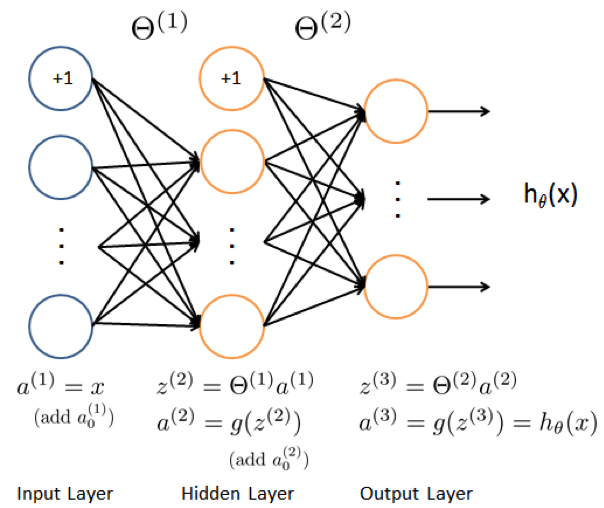

## Feed-Forward Propogation

Feed-Forward Propogation involves the calculation of outputs from one layer to the next.

In our neural network, the Feed-Forward Propogation is shown in the above figure, going from left to right.

- $a^{(l)}$ denotes the activations for layer $l$.
- $z^{(l)}$ is the product of the activation $a^{(l-1)}$ and weights $\Theta^{(l-1)}$. 
- $g(z^{(l)})$ is the sigmoid function applied to each element of $z^{(l)}$. In the last layer, this represents our output hypothesis.
- $z^{(l)}$ can be thought of as our pre-normalized activation function for layer $l$.

Using this forward propogation, we can then compute the cost $J(\theta)$ of the neural network, defined below. Here $m$ is the number of training datasets, whilst $K$ is the number of outputs from the last layer. In our case $K=10$.
\begin{equation*}
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} \Bigl[\, -y^{(i)} \log((h_{\theta}(x^{(i)}))_{k}) + (1+y_{k}^{(i)})\log(1-(h_{\theta}(x^{(i)}))_{k}) \Bigr]\, 
\end{equation*}
Note that here $h_{\theta}(x^{(i)})_{k} = a_{k}^{(3)}$, which is the activation for the $k^{th}$ unit.

For a network with an input layer of $n$ features and a hidden layer with $f$ features, the regularized cost becomes:
\begin{equation*}
J(\theta) = \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K \Bigl[\, -y^{(i)} \log((h_{\theta}(x^{(i)}))_{k}) + (1+y_{k}^{(i)})\log(1-(h_{\theta}(x^{(i)}))_{k}) \Bigr]\, + \frac{\lambda}{2m} \Bigl[\, \sum_{j=1}^{f} \sum_{i=1}^{n} (\Theta_{j,i}^{(1)})^{2} + \sum_{k=1}^{K} \sum_{j=1}^{f} (\Theta_{k,j}^{(2)})^{2} \Bigr]\,
\end{equation*}

### Vectorization
We can vectorize the above calculations in order to efficiently implement them in code. 

Here we denote the capitalized letter as the matrix representation of the corresponding lower case counterpart, for example $A_{(m,k)}^{(3)}$ is the matrix representation of $a_{k}^{(3)}$ given $m$ training datasets.

In general, given $m$ training datasets, $n$ features for the input layer, $f$ features for the hidden layer, and $k$ features for the output layer:

\begin{equation*} Z_{(m,f)}^{(2)} = A_{(m,n)}^{(1)} \cdot \Theta_{(n,f)}^{T(1)} \end{equation*}
\begin{equation*} A_{(m,f)}^{(2)} = g(Z_{(m,f)}^{(2)}) \end{equation*}

\begin{equation*} Z_{(m,k)}^{(3)} = A_{(m,f)}^{(2)} \cdot \Theta_{(f,k)}^{T(2)} \end{equation*}
\begin{equation*} A_{(m,k)}^{(3)} = g(Z_{(m,k)}^{(3)}) \end{equation*}

To calculate the regularized cost $J(\theta)$ we must first define $Y_{(m,k)}$ as a boolean matrix for each training dataset $m$ with the output encoded along $k$. Our cost is then calculated by the equation below.
\begin{equation*}
J(\Theta) = \frac{1}{m} \Bigl( -Y_{(m,k)} *\log{(A_{(m,k)}^{(3)})} - (1-Y_{(m,k)})*\log{(1-A_{(m,k)}^{(3)})}\Bigr) + \frac{\lambda}{2m} \Bigl( \sum_{j=1}^{f} \sum_{i=1}^{n} (\Theta_{j,i}^{(1)})^{2} + \sum_{k=1}^{K} \sum_{j=1}^{f} (\Theta_{k,j}^{(2)})^{2} \Bigr)
\end{equation*}

## Backpropogation

In order to train our neural network, we need some way to calculate the gradient of the cost function, so that we can find the appropriate direction in which to traverse in order to minimize the cost function. Previously we defined the gradient $\nabla J(\theta)$ with the equation below.

\begin{equation*}
\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}
\end{equation*}

However now, as we have several layers, the gradient of the cost function is dependant on each layer. In order to calculate the value we therefore split the function into it's constituent layers, calculating an "error" term $\delta_{j}^{(l)}$ for each node $j$ in each layer $l$ (ie how much that node contributes to the overall error). We then multiply the error term by the activations for the previous layer for all points in the training set.

For the output layer (layer 3) the error is simply the difference between the output and the expected result. Concretely for each output unit $k$ in layer 3 and each datapoint $m$, the error is defined below where $Y_{(m,k)}$ is a matrix containing our expected result for an output unit for each training dataset.

\begin{equation*}
\delta_{(m,k)}^{(3)} = A_{(m,k)}^{(3)} - Y_{(m,k)}
\end{equation*}

The error for each datapoint and node in the hidden layer (layer 2) $\delta_{(m,j)}^{(2)}$ is defined below. Here $\Theta_{(k,j)}^{(2)}$ are the weights of layer 2, and $g'(z_{(m,j)}^{(2)})$ is the derivative of the sigmoid function applied to $z_{(m,j)}^{(2)}$ (see below for definition).

\begin{equation*}
\delta_{(m,j)}^{(2)} = \delta_{(m,k)}^{(3)} \cdot \Theta_{(k,j)}^{(2)} * g'(z_{(m,j)}^{(2)})
\end{equation*}

We do not calculate an error term for the first layer as that is our input layer, not something we want to modify the values for.

By defining the "error" $\delta^{(l)}$ for each layer $l$, the gradient $\frac{\partial}{\partial\Theta^{(l)}}J(\Theta)$ for each layer becomes:

\begin{equation*}
\frac{\partial}{\partial\Theta^{(l)}}J(\Theta) = \frac{1}{m}(\delta^{(l+1)})^{T} \cdot A^{l}
\end{equation*}


### Sigmoid Gradient
The gradient of the sigmoid equation is defined below.
\begin{equation*}
g'(z) = \frac{d}{dz}g(z) = g(z)(1-g(z))
\end{equation*}

### Regularization
To calculate a regularized gradient you can simply add on the regularization term after backpropagating. The regularization term is not applied to the bias node for each layer.

\begin{equation*}
\frac{\partial}{\partial\Theta^{(l)}}J(\Theta) = \frac{1}{m} \Bigl((\delta^{(l+1)})^{T} \cdot A^{l}\Bigr) + \frac{\lambda}{m}\Theta^{(l)}
\end{equation*}

### Random Initializiation

When training neural networks, it is important to randomly initialize the parameters in order to break symmetry. One effective strategy for random initialization is to randomly select values for $\Theta^{(l)}$ uniformly in the range $[-\epsilon, \epsilon]$ where $\epsilon$ is defined by:
\begin{equation*}
\epsilon = \frac{\sqrt{6}}{\sqrt{L_{in}+L_{out}}}
\end{equation*}
Where $L_{in}$ is the number of units in layer $l$, and $L_{out}$ is the number of units in the layer adjacent to $l$.

## Implementation

Now let's implement the above theory in code.

In [40]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))

def unravel_theta(theta_vec, i, h, o):
    '''Unravels Theta Vector into theta matrices theta1 and theta2
    
    Args
        theta_vec (numpy.ndarray): n-dimensional vector containing all theta parameters
        i (int): Input layer size
        h (int): Hidden layer size
        o (int): Output layer size
        
    Returns
        theta1 (np.matrix): Matrix containing Theta1 weights
        theta2 (np.matrix): Matrix containing Theta2 weights
    '''
    
    theta1_vec = theta_vec[:h * (i + 1)]
    theta1 = np.matrix(np.reshape(theta1_vec, (h, (i + 1))))

    theta2_vec = theta_vec[h * (i + 1):]
    theta2 = np.matrix(np.reshape(theta2_vec, (o, (h + 1))))
    
    return theta1, theta2

def feed_forward(X, theta1, theta2):
    '''Forward propogation
    
    Args
        X (np.matrix): Training dataset
        theta1 (np.matrix): Weights from input layer
        theta2 (np.matrix): Weightd from hidden layer
        
    Returns
        out (dict): Dictionary containing activations for each layer and z matrices
    '''
    m = X.shape[0]
    # Let's store it in a dict for ease of use
    out = {}
    # Calculate activations for input layer and add bias unit
    out['a1'] = np.insert(X, 0, values=np.ones(m), axis=1)
    out['z2'] = out['a1'] * theta1.T
    # Calculate activations for hidden layer and add bias unit
    out['a2'] = np.insert(sigmoid(out['z2']), 0, values=np.ones(m), axis=1)
    out['z3'] = out['a2'] * theta2.T
    # Calculate activations (hypothesis) for output layer
    out['a3'] = sigmoid(out['z3'])
    
    return out

def costFunction(params, input_size, hidden_size, output_size, X, y, lmbda):
    '''Neural Network Cost function, network contains one input, one hidden, and one output layer
    
    Args
        params (np.ndarray): Vector containing neural network parameters, will be reshaped given
        the sizes of the layers
        input_size (int): Number of nodes in the input layer
        hidden_size (int): Number of nodes in the hidden layer
        output_size (int): Number of nodes in the output layer
        X (np.matrix): Training dataset
        y (np.matrix): Encoded labels
        lmbda (float): Learning rate of Neural Network
        
    Returns
        J (float): Cost
        out (dict): dict containing activations and z-matrices
        theta1 (np.matrix): Theta1 weights
        theta2 (np.matrix): Theta2 weights
    '''
    # Convert variables into matrices
    m = X.shape[0]
    
    # Reshape params into the parameters for each layer
    theta1, theta2 = unravel_theta(params, input_size, hidden_size, output_size)
    
    # Forward propogate
    out = feed_forward(X, theta1, theta2)
    
    # Calculate cost
    first = np.multiply(-y,np.log(out['a3']))
    second = np.multiply(1-y,np.log(1 - out['a3']))
    
    J = ((1/m) * np.sum(np.sum(first - second)))

    # Add regularization
    J += ((float(lmbda)/(2*m)) * (np.sum(np.sum(np.square(theta1[:,1:]))) + np.sum(np.sum(np.square(theta2[:,1:]))) ))
    
    return J, out, theta1, theta2

In [41]:
def back_prop(params, input_size, hidden_size, output_size, X, y, lmbda):
    '''Back propogation algorithm
    
    Args
        params (np.ndarray): Vector containing neural network parameters, will be reshaped given
        the sizes of the layers
        input_size (int): Number of nodes in the input layer
        hidden_size (int): Number of nodes in the hidden layer
        output_size (int): Number of nodes in the output layer
        X (np.ndarray): Training dataset
        y (np.ndarray): Encoded labels
        lmbda (float): Learning rate of Neural Network
        
    Returns
        J (float): Cost
        grad (np.ndarray): 1D Array containing gradients for layer 1 and 2
    '''
    # Convert variables into matrices
    m = X.shape[0]
    if type(X) == np.matrix:
        X = np.matrix(X)
    if type(y) == np.matrix:
        y = np.matrix(y)
    
    # Calculate cost using function above
    J, out, theta1, theta2 = costFunction(params, input_size, hidden_size, output_size, X, y, lmbda)
    
    # Calculate errors
    delta3 = out['a3'] - y
    delta2 = np.multiply((delta3 * theta2), np.insert(sigmoid_gradient(out['z2']), 0, values=np.ones(m), axis=1))
    # Remove 1st column of delta2 (bias unit)
    delta2 = np.delete(delta2, 0, 1)
    
    # Calculate regularization
    reg1 = (lmbda/m) * theta1
    reg1[:,0] = 0 # no regularization for bias unit

    reg2 = (lmbda/m) * theta2
    reg2[:,0] = 0 # no regularization for bias unit.

    # Caluclate gradients
    
    theta2_grad = ((delta3.T * out['a2'])/m) + reg2  
    theta1_grad = ((delta2.T * out['a1'])/m) + reg1

    # Roll up the gradient matrices into a single vector
    grad = np.concatenate((np.ravel(theta1_grad), np.ravel(theta2_grad)))
    
    return J, grad

## Data

Let's now import some data and train our model

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

data = loadmat('data/ex3data1.mat')

X = data['X']
y = data['y']

### Label Encoding

In order to effificiently perform calculations we must first convert the label vector from an $(m,1)$ vector, where each entry represents the label (from 1 to $k$) for that training dataset, to an $(m,k)$ matrix where each row has $k$ binary values, where 1 represents the label for that datapoint at its corresponding index. 
eg. a label of 2 where the number of classes is $k=5$: [0 1 0 0 0].

To do this we can use a function from the scikit-learn python module.

In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
Y = encoder.fit_transform(y)

Let's initialize some variables about the network

In [44]:
input_size = 400
hidden_size = 25
output_size = 10
learning_rate = 1

# randomly initialize a parameter array of the size of the full network's parameters
params = (np.random.random(size=hidden_size * (input_size + 1) + output_size * (hidden_size + 1)) - 0.5) * 0.25

Now we can use a scipy module to find the minimum cost of our neural net.

In [45]:
from scipy.optimize import minimize

# minimize the function back_prop
fmin = minimize(fun=back_prop, x0=params, args=(input_size, hidden_size, output_size, X, Y, learning_rate), 
                method='TNC', jac=True, options={'maxiter': 300, 'disp': True})
fmin

     fun: 0.343591069218515
     jac: array([ 2.79175733e-04, -7.46192334e-08,  2.89885095e-07, ...,
        3.01543520e-05, -6.21599986e-05, -6.96271534e-06])
 message: 'Max. number of function evaluations reached'
    nfev: 300
     nit: 23
  status: 3
 success: False
       x: array([-7.38738382e-01, -3.73096167e-04,  1.44942548e-03, ...,
        1.87028019e-01,  1.38110632e+00,  1.76262061e+00])

Now we can calculate our prediction rate on the training dataset, first by calculating the activations at our minimized $\theta$'s

In [46]:
out = feed_forward(X, theta1, theta2)
y_pred = np.array(np.argmax(out['a3'], axis=1) + 1)

correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y)]
acc = float(sum(correct)) / float(len(correct))
print('accuracy = {0:.2f}%'.format(acc * 100))

accuracy = 99.48%


## Gradient Checking